In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.14.0'

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading CSV file

df = pd.read_csv(r"C:\Users\aasri\Downloads\housing.csv")
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [7]:
# Giving Names to our columns


column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(r"C:\Users\aasri\Downloads\housing.csv",header=None, delimiter=r"\s+",names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
# No. of Rows and Columns

df.shape

(506, 14)

In [9]:
# To check Null values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

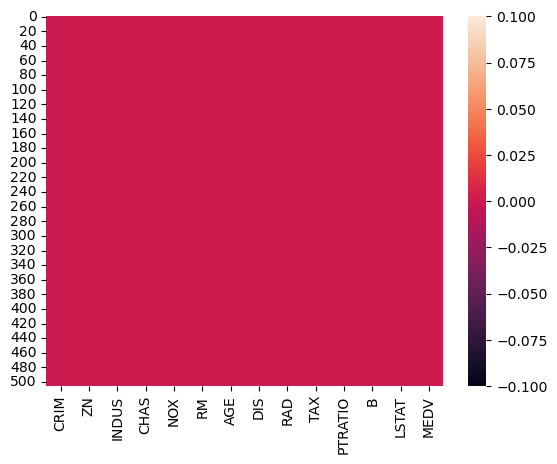

In [10]:
# Visualization for finding null values

sns.heatmap(df.isnull())
plt.show()

In [11]:
# To check every column is in numeric type

df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [12]:
# To check duplicate values/rows

df.duplicated().sum()

0

In [13]:
# Select input and output (features and target)

x = df.drop('MEDV',axis=1)
y = df['MEDV']

In [14]:
# Splitting our data / Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [15]:
# Apply Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [16]:
# Shape of x_train, x_test

x_train.shape,x_test.shape

((354, 13), (152, 13))

In [17]:
# Creating a Neural Network (ANN)
# Using Inbuilt class Sequential which is defined in tensorflow.keras
# Creating Object of Sequential class

model = tf.keras.Sequential([
    # first hidden layer
    tf.keras.layers.Dense(units=14,activation='relu',input_shape=(13,)),
    # Output layer
    tf.keras.layers.Dense(units=1,activation='linear')])

In [18]:
# To show summary of our model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile our Model

model.compile(optimizer='sgd',loss='mse')

In [20]:
# Creating a procedure to decide the no. of epochs to train the model (EarlyStopping)

from tensorflow.keras.callbacks import EarlyStopping

# create object for EarlyStopping class
cb = EarlyStopping(
    monitor = 'val_loss',   # testing error
    min_delta = 0.00001,    # min value of delta
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False)

In [21]:
# Train our model, fit()

trained_model = model.fit(x_train,y_train,epochs=5000,callbacks=cb,validation_data=(x_test,y_test))  

Epoch 1/5000
12/12 [==============================] - 1s 35ms/step - loss: 231.2224 - val_loss: 40.8842
Epoch 2/5000
12/12 [==============================] - 0s 7ms/step - loss: 29.7732 - val_loss: 29.9187
Epoch 3/5000
12/12 [==============================] - 0s 8ms/step - loss: 25.5591 - val_loss: 650.7820
Epoch 4/5000
12/12 [==============================] - 0s 7ms/step - loss: 81.2357 - val_loss: 33.2857
Epoch 5/5000
12/12 [==============================] - 0s 7ms/step - loss: 19.0511 - val_loss: 21.4865
Epoch 6/5000
12/12 [==============================] - 0s 8ms/step - loss: 18.4002 - val_loss: 61.7162
Epoch 7/5000
12/12 [==============================] - 0s 8ms/step - loss: 26.4042 - val_loss: 12.3958
Epoch 8/5000
12/12 [==============================] - 0s 8ms/step - loss: 15.3887 - val_loss: 10.8913
Epoch 9/5000
12/12 [==============================] - 0s 8ms/step - loss: 14.5026 - val_loss: 14.2262
Epoch 10/5000
12/12 [==============================] - 0s 8ms/step - loss: 13.3

In [22]:
# Checking Training and Testing loss (This is the last iteration from above where our model stopped)

print('Training_loss :',model.evaluate(x_train,y_train))
print('Testing_loss :',model.evaluate(x_test,y_test))

12/12 [==============================] - 0s 4ms/step - loss: 9.4293
Training_loss : 9.429298400878906
5/5 [==============================] - 0s 7ms/step - loss: 9.3353
Testing_loss : 9.335343360900879


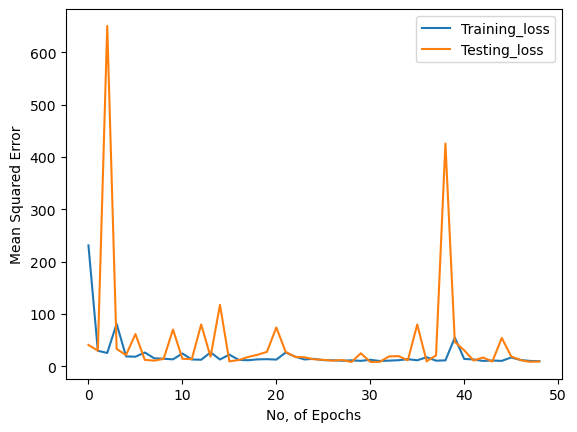

In [23]:
# Visualizing loss and epochs of  each iteration

plt.plot(trained_model.history['loss'],label='Training_loss')
plt.plot(trained_model.history['val_loss'],label='Testing_loss')
plt.xlabel('No, of Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [24]:
# To show weight and bias of each layer

model.get_weights()


# 1. hidden layer weight
# 2. hidden layer bias
# 3. output layer weight
# 4. output layer bias

[array([[-2.50144571e-01, -9.44938600e-01, -7.25671470e-01,
         -1.70948222e-01, -7.32837558e-01, -6.32246554e-01,
         -3.00349772e-01, -9.19634923e-02,  6.73763156e-01,
          1.69053718e-01, -2.80331582e-01, -1.14408791e+00,
         -1.53237000e-01,  4.84361090e-02],
        [ 2.33816765e-02,  1.89144649e-02,  5.16698137e-02,
          9.49831679e-02, -3.48617196e-01, -2.65183687e-01,
         -2.22014070e-01,  4.02506776e-02, -2.40220562e-01,
          8.15590978e-01, -6.64787769e-01, -5.21355867e-01,
          6.42640442e-02,  2.65863329e-01],
        [ 6.79358900e-01, -7.50934839e-01, -1.27491772e-01,
         -4.06764969e-02, -6.66889250e-01,  1.41020313e-01,
          9.89290699e-02,  2.88016856e-01, -3.45024198e-01,
          7.64790952e-01,  1.69668049e-01,  1.29117000e+00,
         -3.59015554e-01, -1.40468329e-01],
        [ 8.30545068e-01,  7.06281841e-01, -8.73566329e-01,
          2.94322163e-01, -1.50256619e-01, -5.96743166e-01,
          1.75299179e-02, -9

In [25]:
# Test the model (prediction)

Y_pred = model.predict(x_test)

5/5 [==============================] - 0s 3ms/step


In [27]:
# Check the r2_score (accuracy)

from sklearn.metrics import r2_score
print(r2_score(y_test,Y_pred)*100)

89.81463408909565
